In [1]:
from fbprophet import Prophet
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

import json

%matplotlib inline

In [2]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]

In [3]:
labels = wrangled_issues_df.groupby(['created_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'created_at':'ds'},inplace=True)
m = Prophet(yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

D:\Tools\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.0.
D:\Tools\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


D:\Tools\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


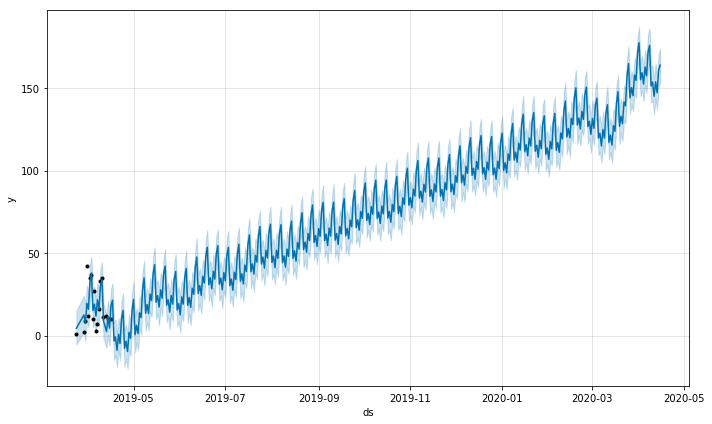

In [4]:
fig1 = m.plot(forecast)
# 3.  Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

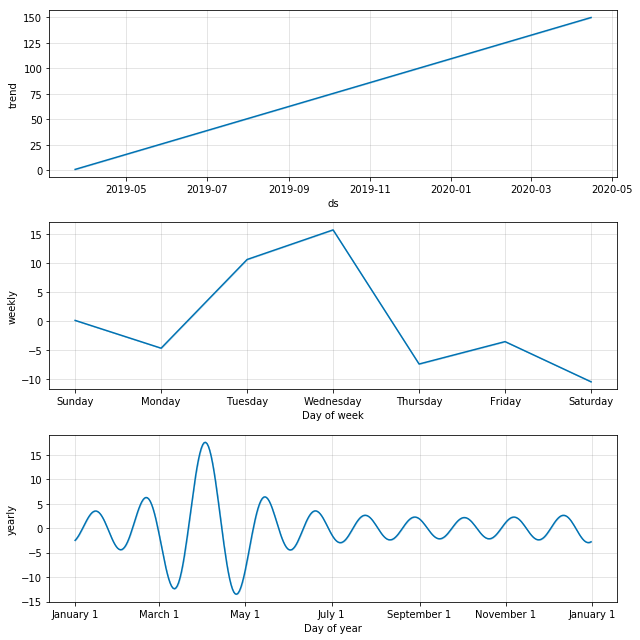

In [5]:
fig2 = m.plot_components(forecast)

In [6]:
# 1.  The day of the week maximum number of issues created is Wednesday

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.


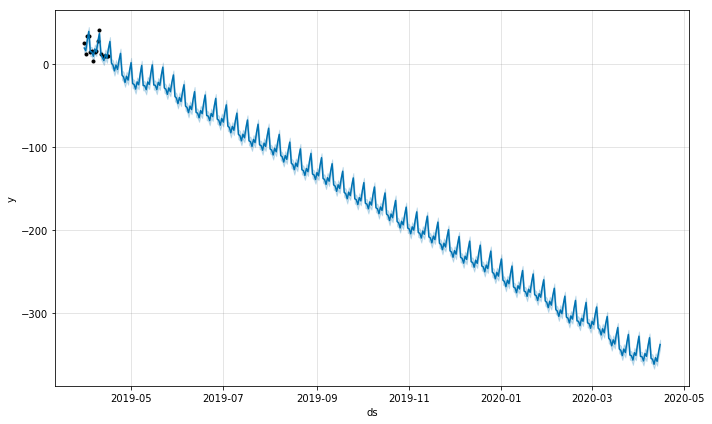

In [7]:
labels = wrangled_issues_df.groupby(['closed_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'closed_at':'ds'},inplace=True)
m = Prophet(yearly_seasonality=True,)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

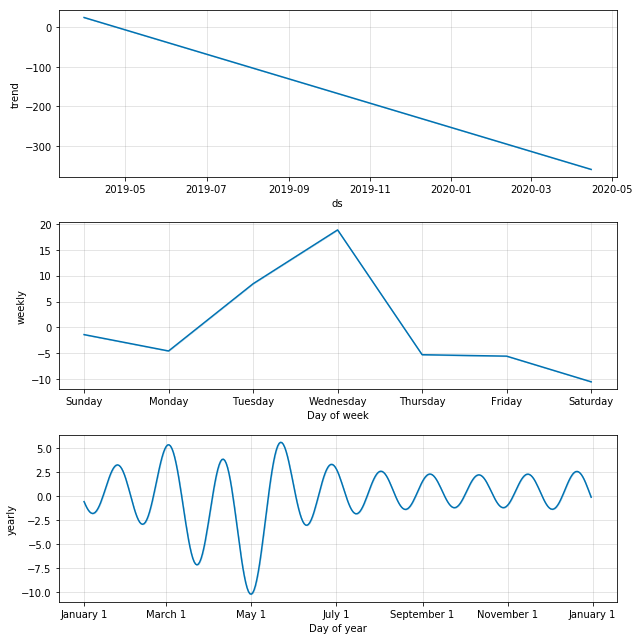

In [8]:
fig2 = m.plot_components(forecast)
# 4.  Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly
# seasonality of the time series. If you include holidays, you’ll see those here, too.

In [9]:
# 2.  The day of the week maximum number of issues closed is Wednesday

In [10]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19pulls.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','pulled_at']]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.0.


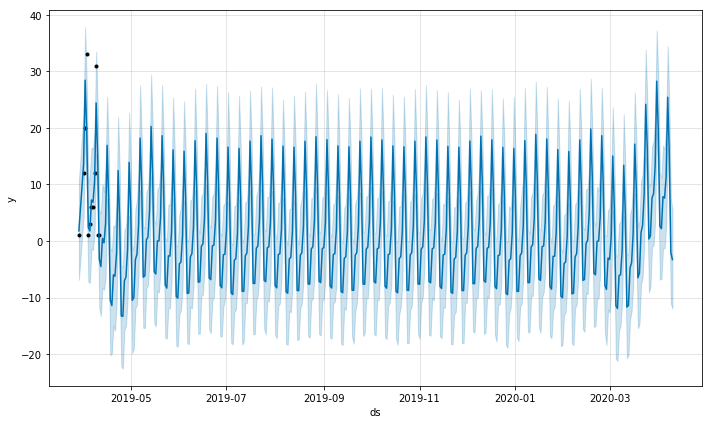

In [11]:
labels = wrangled_issues_df.groupby(['pulled_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'pulled_at':'ds'},inplace=True)
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

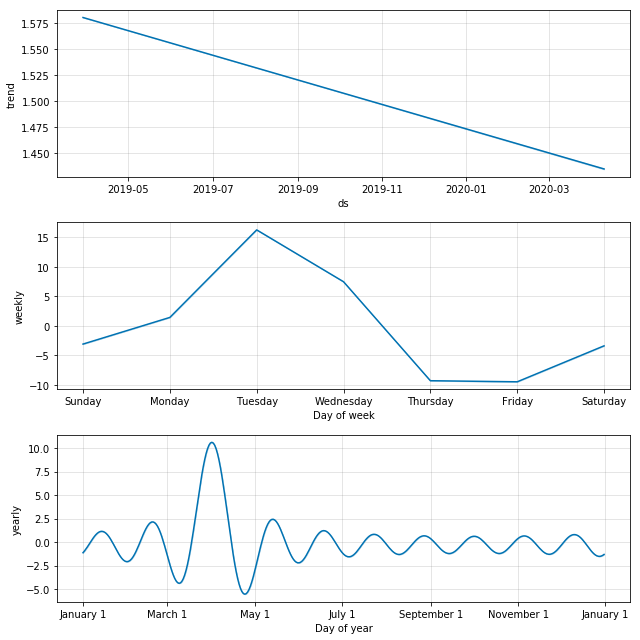

In [12]:
fig2 = m.plot_components(forecast)
# 5.  Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
# you’ll see those here, too.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.


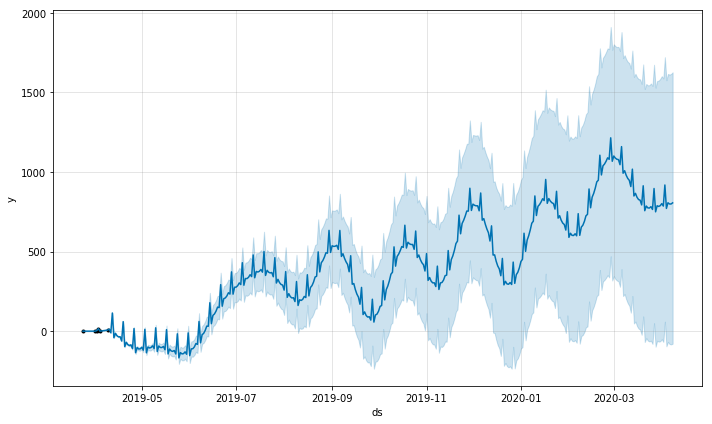

In [13]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19commits.json')]
issues_df = DataFrame(list_of_issues_dict_data)
wrangled_issues_df = issues_df[['Author','commited_at']]
labels = wrangled_issues_df.groupby(['commited_at'])["Author"].count().reset_index()
labels.rename(columns={"Author":"y",'commited_at':'ds'},inplace=True)
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.fit(labels)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

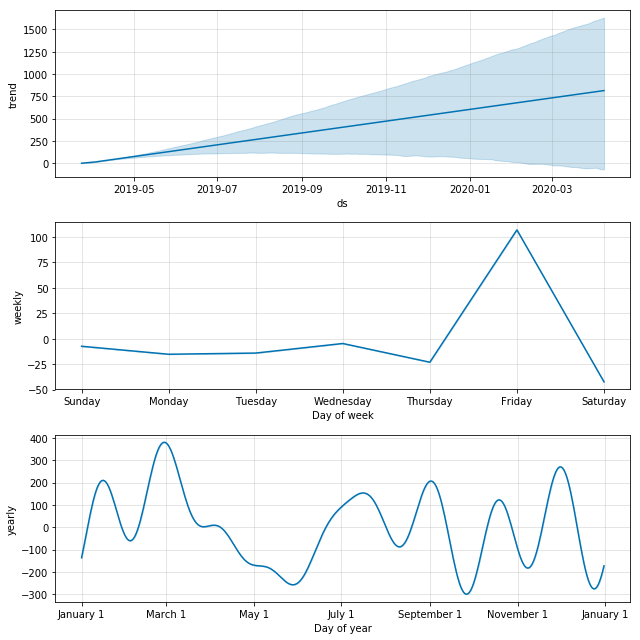

In [14]:
fig2 = m.plot_components(forecast)
# 6.  Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
# you’ll see those here, too.